In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
db = pd.read_csv("/content/drive/MyDrive/dataset/BRSM_assignments/data_experiment_1.csv")

In [ ]:
db

,subject_ID,age_in_years,age_in_months,gender,gender_coded,age_group,age_group_coded,info_choice,condition,catch_trials,...,q9,q10,q11,q12,q13,catch_trials_score,trial_number,prop_correct_fishing,fishing_rewardL,fishing_rewardR
0,3626472,5,61,Male,1,5-Apr,0,1.0,trial_1,NaN,...,2,2,2,2,2,100,1.0,0.636364,0.0,-10.0
1,3626472,5,61,Male,1,5-Apr,0,0.0,trial_2,NaN,...,2,2,2,2,2,100,2.0,0.636364,0.0,20.0
2,3626472,5,61,Male,1,5-Apr,0,1.0,trial_3,NaN,...,2,2,2,2,2,100,3.0,0.636364,-10.0,0.0
3,3626472,5,61,Male,1,5-Apr,0,1.0,trial_4,NaN,...,2,2,2,2,2,100,4.0,0.636364,-10.0,10.0
4,3626472,5,61,Male,1,5-Apr,0,1.0,trial_5,NaN,...,2,2,2,2,2,100,5.0,0.636364,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,6362342,7,95,Female,2,7-Jun,1,1.0,trial_26,NaN,...,2,2,2,1,2,100,26.0,0.567568,0.0,0.0
6652,6362342,7,95,Female,2,7-Jun,1,0.0,trial_27,NaN,...,2,2,2,1,2,100,27.0,0.567568,20.0,-10.0
6653,6362342,7,95,Female,2,7-Jun,1,1.0,trial_28,NaN,...,2,2,2,1,2,100,28.0,0.567568,0.0,-10.0
6654,6362342,7,95,Female,2,7-Jun,1,1.0,trial_29,NaN,...,2,2,2,1,2,100,29.0,0.567568,20.0,10.0


In [ ]:
db.columns

Index(['subject_ID', 'age_in_years', 'age_in_months', 'gender', 'gender_coded',
       'age_group', 'age_group_coded', 'info_choice', 'condition',
       'catch_trials', 'fishing_choiceL', 'fishing_choiceR', 'RT_catch',
       'RT_info_choice', 'RT_fishingL', 'RT_fishingR', 'items_countL',
       'items_countR', 'agency_probL', 'agency_probR', 'EV_L', 'EV_R',
       'EV_flashL', 'EV_flashR', 'SD_L', 'SD_R', 'uncertainty_level_L',
       'uncertainty_level_R', 'delta_EV', 'delta_SD',
       'delta_uncertainty_level', 'delta_agency', 'items_count_flashL',
       'items_count_flashR', 'EV_at_fishingL', 'EV_at_fishingR', 'wob',
       'avg_wob_RT', 'percent_comprehension', 'q1', 'q2', 'q3', 'q4', 'q5',
       'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13',
       'catch_trials_score', 'trial_number', 'prop_correct_fishing',
       'fishing_rewardL', 'fishing_rewardR'],
      dtype='object')

In [ ]:
unique_rows = db.drop_duplicates(subset='subject_ID')
desired_columns = ['age_in_years', 'percent_comprehension', 'gender']
total_data = unique_rows[desired_columns]
female_data = total_data[total_data['gender'] == 'Female']
male_data = total_data[total_data['gender'] == 'Male']
male_data = male_data.drop(np.random.choice(male_data.index, size=14, replace=False))

In [ ]:
total_data.describe()

,age_in_years,percent_comprehension
count,208.000000,208.000000
mean,7.447115,0.956916
std,2.382929,0.074276
min,4.000000,0.615385
25%,5.000000,0.923077
50%,7.000000,1.000000
75%,9.000000,1.000000
max,12.000000,1.000000


In [ ]:
print(male_data.describe())
print(female_data.describe())

       age_in_years  percent_comprehension
count     97.000000              97.000000
mean       7.597938               0.956780
std        2.430963               0.070277
min        4.000000               0.653846
25%        6.000000               0.923077
50%        7.000000               1.000000
75%        9.000000               1.000000
max       12.000000               1.000000
       age_in_years  percent_comprehension
count     97.000000              97.000000
mean       7.391753               0.962331
std        2.284717               0.068663
min        4.000000               0.615385
25%        6.000000               0.961538
50%        7.000000               1.000000
75%        9.000000               1.000000
max       12.000000               1.000000


<ipython-input-8-67685ad5dc83>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_df, x='gender', y='percent_comprehension', palette=colors)


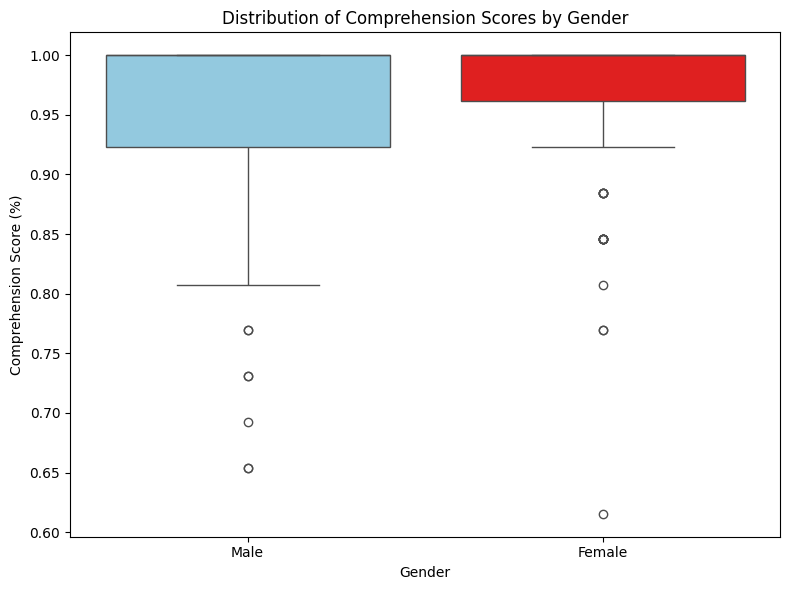

In [ ]:
total_df = pd.DataFrame(total_data)

# Define colors for the boxes
colors = {'Male': 'skyblue', 'Female': 'red'}

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(data=total_df, x='gender', y='percent_comprehension', palette=colors)
plt.xlabel('Gender')
plt.ylabel('Comprehension Score (%)')
plt.title('Distribution of Comprehension Scores by Gender')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

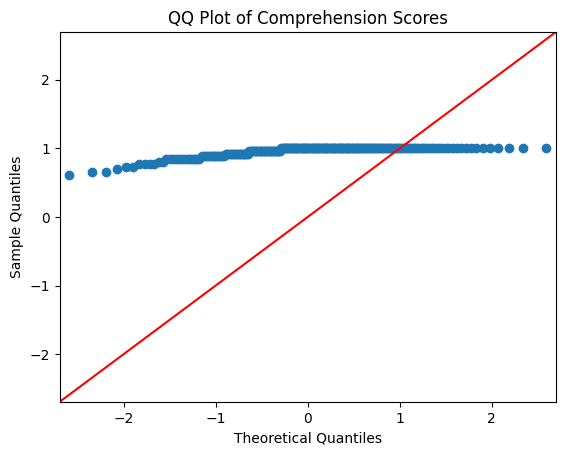

In [ ]:
import statsmodels.api as sm

# Generate QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(total_df['percent_comprehension'], line ='45')
plt.title('QQ Plot of Comprehension Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

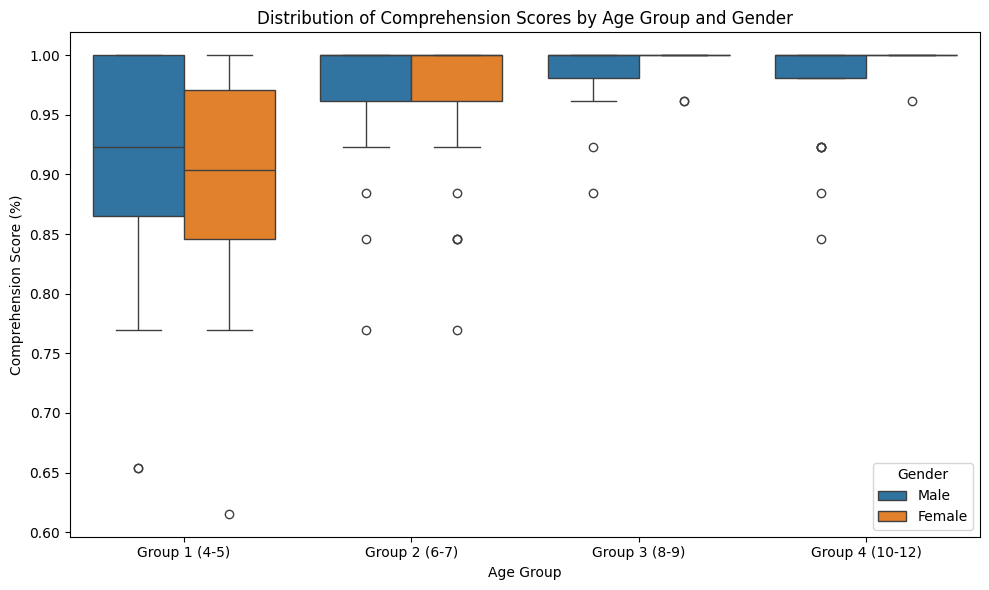

In [ ]:
male_df = pd.DataFrame(male_data)
female_df = pd.DataFrame(female_data)

# Define age bins and labels
bins = [3, 5, 7, 9, 12]
labels = ['Group 1 (4-5)', 'Group 2 (6-7)', 'Group 3 (8-9)', 'Group 4 (10-12)']

# Bin the ages
male_df['age_group'] = pd.cut(male_df['age_in_years'], bins=bins, labels=labels)
female_df['age_group'] = pd.cut(female_df['age_in_years'], bins=bins, labels=labels)

# Combine the data
combined_df = pd.concat([male_df, female_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='age_group', y='percent_comprehension', hue='gender')
plt.xlabel('Age Group')
plt.ylabel('Comprehension Score (%)')
plt.title('Distribution of Comprehension Scores by Age Group and Gender')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for independent samples
statistic, p_value = mannwhitneyu(male_data['percent_comprehension'], female_data['percent_comprehension'])

# Set significance level
alpha = 0.05

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("P-Value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a difference in comprehension scores between males and females.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no difference in comprehension scores between males and females.")

Mann-Whitney U Statistic: 4396.5
P-Value: 0.3688217653933251
Fail to reject Null Hypothesis (H0): There is no difference in comprehension scores between males and females.


In [ ]:
from scipy.stats import shapiro

statistic_male, p_value_male = shapiro(male_data['percent_comprehension'])
print("Shapiro-Wilk test for male data:")
print("Statistic:", statistic_male)
print("p-value:", p_value_male)

# Perform Shapiro-Wilk test for female data
statistic_female, p_value_female = shapiro(female_data['percent_comprehension'])
print("\nShapiro-Wilk test for female data:")
print("Statistic:", statistic_female)
print("p-value:", p_value_female)

Shapiro-Wilk test for male data:
Statistic: 0.6676347255706787
p-value: 1.6832093715796886e-13

Shapiro-Wilk test for female data:
Statistic: 0.6188777685165405
p-value: 1.701075430960309e-14


In [ ]:

# Add age group column to male_data
male_data['age_group'] = pd.cut(male_data['age_in_years'], bins=bins, labels=labels)

# Add age group column to female_data
female_data['age_group'] = pd.cut(female_data['age_in_years'], bins=bins, labels=labels)

# Group male_data by age group
male_grouped = male_data.groupby('age_group')

# Group female_data by age group
female_grouped = female_data.groupby('age_group')

# Perform statistical tests for each age group
for age_group in labels:
    male_scores = male_grouped.get_group(age_group)['percent_comprehension']
    female_scores = female_grouped.get_group(age_group)['percent_comprehension']

    # Perform appropriate statistical test (e.g., Mann-Whitney U test)
    statistic, p_value = mannwhitneyu(male_scores, female_scores)

    # Set significance level
    alpha = 0.05

    # Print results
    print(f"Age Group: {age_group}")
    print("Mann-Whitney U Statistic:", statistic)
    print("P-Value:", p_value)

    # Compare p-value with significance level
    if p_value < alpha:
        print("Reject Null Hypothesis (H0): There is a difference in median comprehension scores between genders.")
    else:
        print("Fail to reject Null Hypothesis (H0): There is no difference in median comprehension scores between genders.")
    print()



Age Group: Group 1 (4-5)
Mann-Whitney U Statistic: 287.5
P-Value: 0.8114762336297863
Fail to reject Null Hypothesis (H0): There is no difference in median comprehension scores between genders.

Age Group: Group 2 (6-7)
Mann-Whitney U Statistic: 374.5
P-Value: 0.8575825883875328
Fail to reject Null Hypothesis (H0): There is no difference in median comprehension scores between genders.

Age Group: Group 3 (8-9)
Mann-Whitney U Statistic: 216.5
P-Value: 0.11328205141840612
Fail to reject Null Hypothesis (H0): There is no difference in median comprehension scores between genders.

Age Group: Group 4 (10-12)
Mann-Whitney U Statistic: 216.0
P-Value: 0.04077541245934898
Reject Null Hypothesis (H0): There is a difference in median comprehension scores between genders.



<ipython-input-13-43b72f1896e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age_group'] = pd.cut(female_data['age_in_years'], bins=bins, labels=labels)


<ipython-input-14-0c23cf5915ad>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age_group'] = pd.cut(female_data['age_in_years'], bins=bins, labels=labels)


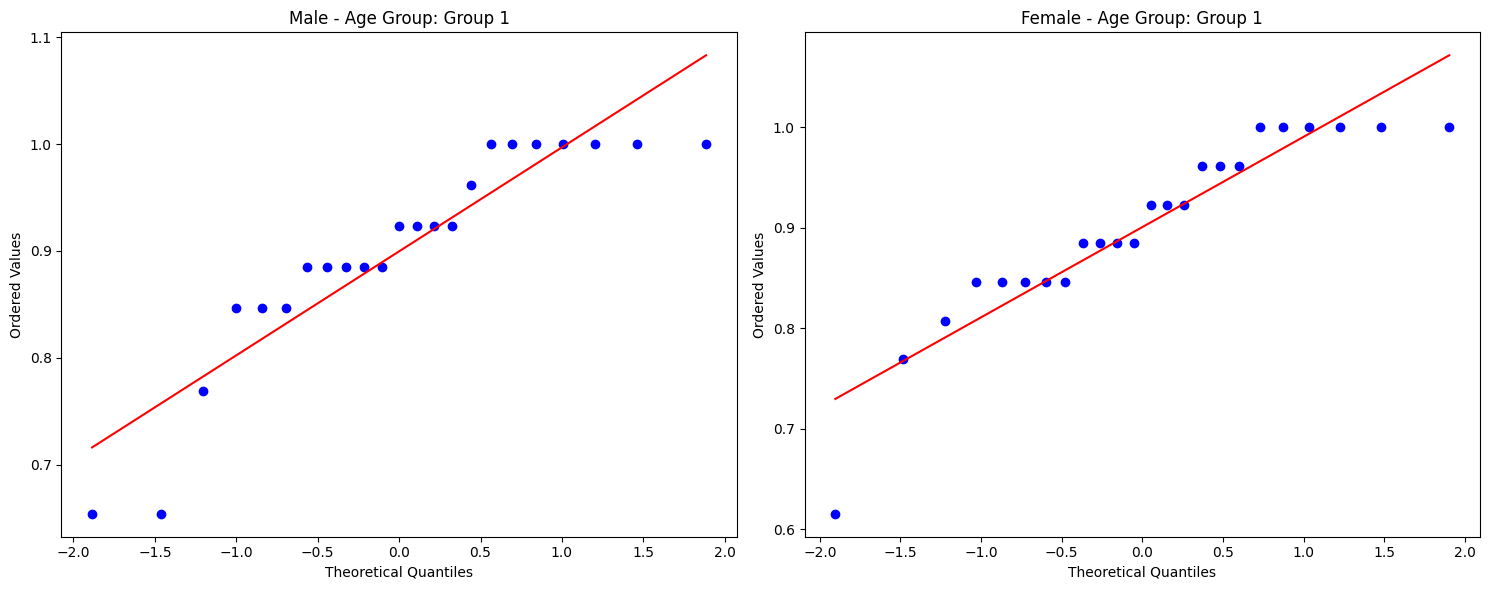

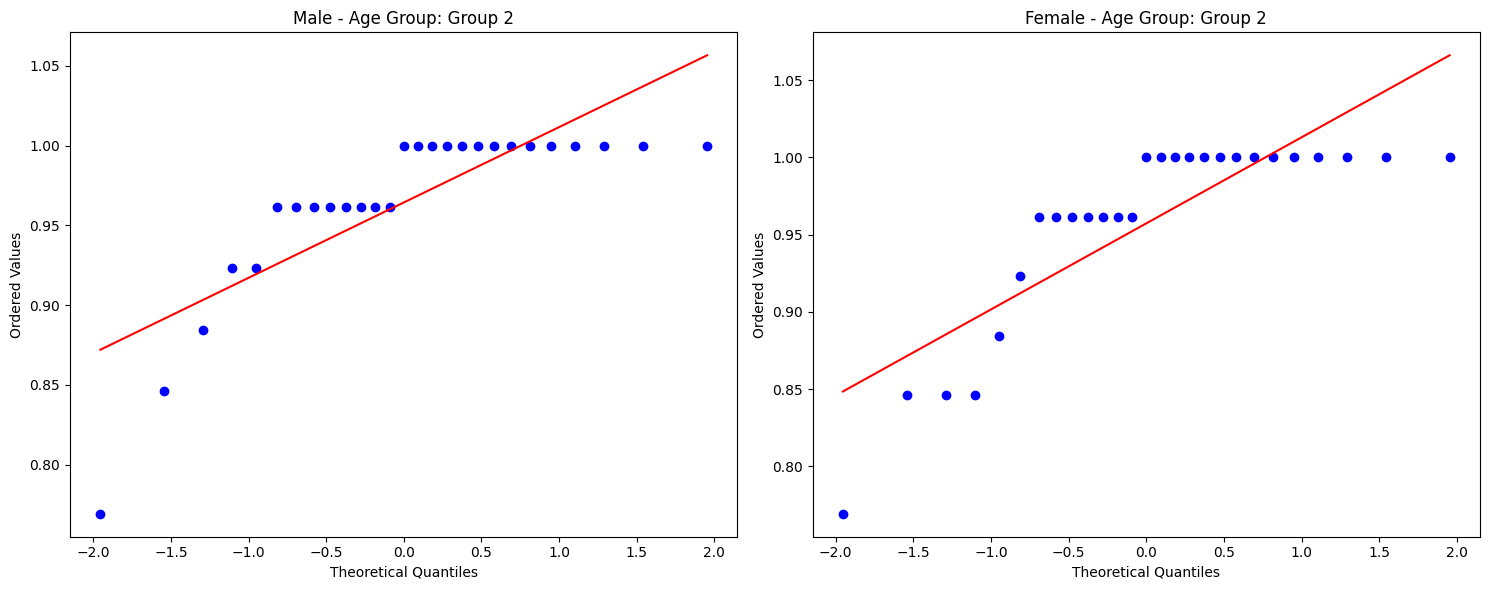

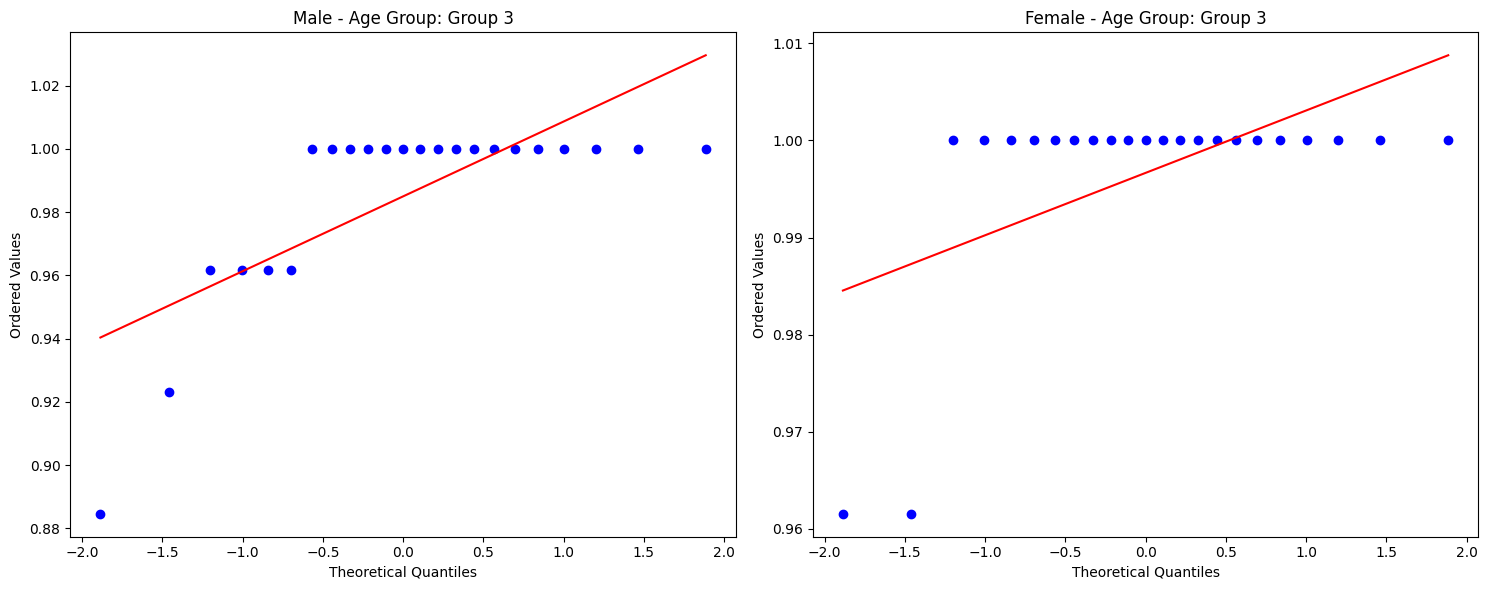

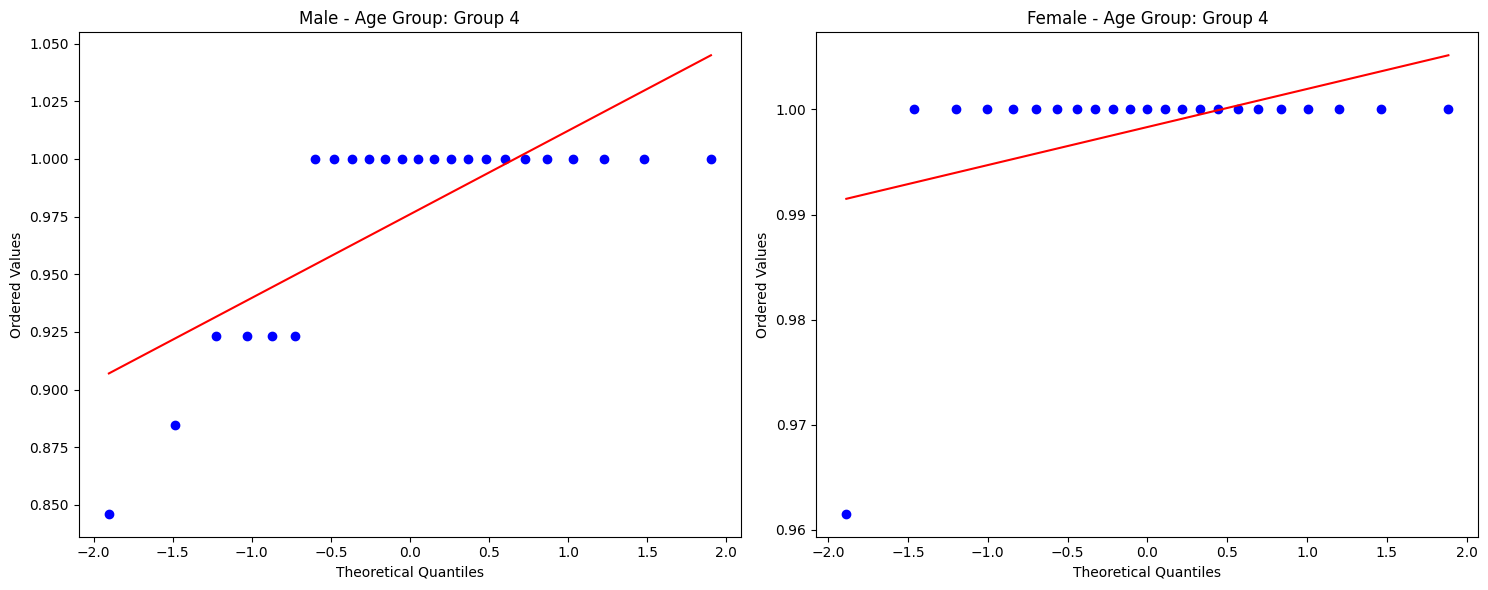

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define age groups
bins = [3, 5, 7, 9, 12]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Add age group column to male_data
male_data['age_group'] = pd.cut(male_data['age_in_years'], bins=bins, labels=labels)

# Add age group column to female_data
female_data['age_group'] = pd.cut(female_data['age_in_years'], bins=bins, labels=labels)

# Group male_data by age group
male_grouped = male_data.groupby('age_group')

# Group female_data by age group
female_grouped = female_data.groupby('age_group')

# Plot Q-Q plots for each age group within each gender
for age_group in labels:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Male data
    male_scores = male_grouped.get_group(age_group)['percent_comprehension']
    stats.probplot(male_scores, dist="norm", plot=axes[0])
    axes[0].set_title(f'Male - Age Group: {age_group}')
    axes[0].set_xlabel('Theoretical Quantiles')
    axes[0].set_ylabel('Ordered Values')

    # Female data
    female_scores = female_grouped.get_group(age_group)['percent_comprehension']
    stats.probplot(female_scores, dist="norm", plot=axes[1])
    axes[1].set_title(f'Female - Age Group: {age_group}')
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Ordered Values')

    plt.tight_layout()
    plt.show()
